<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 2 / SPRINT 3 / NOTE 2*

# 📝 Assignment
---

# 🌱 **기본 과제**

#### **이전 과제의 Part.2 모델 학습 부분까지 동일하게 과제를 수행합니다.**

In [ ]:
!pip install category_encoders 
!pip install eli5 
!pip install pdpbox

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from pdpbox.pdp import pdp_isolate, pdp_plot

## **Part 1. 데이터 준비**

- 어제 사용했던 데이터셋을 불러오세요.

- 타겟과 특성을 지정해 주세요. 
  - 타겟은 `Attrition`입니다.  
- 훈련/평가 데이터셋을 분리하세요.
  - 훈련/평가 데이터의 비율은 8:2로 합니다.
  - `random_state=42`로 설정합니다. 


In [ ]:
# 데이터셋 불러오기 
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/Employee-Attrition.csv')
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
# target, features 지정 
y = df['Attrition']
X = df.drop('Attrition', axis=1)

In [ ]:
# train/test dataset 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 34), (294, 34), (1176,), (294,))

## **Part 2. 모델 학습**

- 타겟 Label을 `No=0`, `Yes=1`로 변환하세요.
  - 훈련/평가 데이터 모두 변환합니다. 
- 훈련 데이터셋에 대하여 기준모델의 AUC score를 확인하세요.
  - 기준모델은 최빈값으로 만듭니다.
- `OrdinalEncoder()`를 사용하여 특성을 인코딩하세요. 
- `RandomForestClassifier()`를 사용하여 랜덤포레스트 모델을 학습하세요. 
  - `random_state=42`로 설정합니다. 
  - `n_jobs=-1`, `max_depth=3`으로 설정합니다. 
- `Cross_val_score()`를 활용해서 학습시킨 랜덤포레스트 모델의 검증 score를 구하세요.
  - `cv=10`, `n_jobs=-1`로 설정합니다. 
  - `scoring`은 `roc_auc`를 사용합니다.
  - 검증 score는 평균값으로 구할 수 있습니다.

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


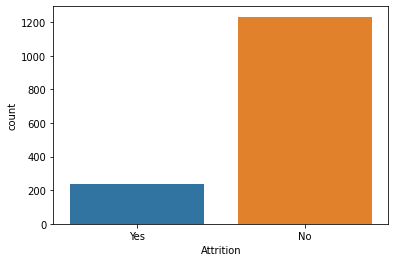

In [ ]:
# 타겟 데이터 범주 비율 확인
print(y.value_counts(normalize=True))
sns.countplot(x=y);

In [ ]:
# 타겟 라벨 인코딩 

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
# 기준모델 AUC score
base_major = pd.Series(y_train).mode()

y_pred_base = [base_major] * len(y_train)
print('Baseline AUC :', round(roc_auc_score(y_train, y_pred_base),2))

Baseline AUC : 0.5


In [ ]:
from sklearn.model_selection import cross_val_score

# RandomForest 학습 
pipe = make_pipeline(
    OrdinalEncoder(),
    RandomForestClassifier(n_jobs=-1, 
                           random_state=42,
                           max_depth=3
                           )
    )


pipe.fit(X_train, y_train)

# 데이터셋이 작아서 cross_val_score로 검증 점수 확인
cv = cross_val_score(pipe,
                     X_train,
                     y_train,
                     cv = 10,
                     scoring='roc_auc',
                     n_jobs=-1
)

# AUC score 확인 
y_pred_proba = pipe.predict_proba(X_train)[:, 1]
print('train score : ', roc_auc_score(y_train, y_pred_proba))
print('cv score : ', cv.mean())

train score :  0.8660789903121192
cv score :  0.8021099139601582


In [ ]:
# # test set으로 일반화 성능 확인
# print("test AUC: ", round(roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]), 2))

## **Part 3. ICE PLOT**

- Test Set의 100번째 샘플을 사용해서 ICE Plot을 그려보세요.

- 아래 특성들에 대한 ICE Plot을 그려보고 특성 값이 변화함에 따라 타겟값이 하락하는 경향을 보이는 특성을 찾아보세요.

>`'JobSatisfaction'`

> `'DistanceFromHome'`

> `'JobInvolvement'`
 
> `'TotalWorkingYears'`

##### **Q1. Test Set의 100번째 샘플로 ICE Plot을 그려보고 특성 값이 변화함에 따라 타겟값이 하락하는 경향을 보여주는 특성을 모두 고르세요.**

In [ ]:
features = ['JobSatisfaction', 'DistanceFromHome', 'JobInvolvement', 'TotalWorkingYears']

In [ ]:
# test dataset 특성 Ordinal Encoding  
X_test_preprocessed = pipe[0].transform(X_test)

def ice_plot(sample, feature, estimator):
  range_ = range(X_test_preprocessed[feature].min(), X_test_preprocessed[feature].max() + 1)

  results = []

  for i in range_:
      sample[feature] = i 
      sample_pred_proba = estimator.predict_proba(sample)[:, 1]
      results.append(sample_pred_proba.item())
  results = np.array(results)
  results -= results[0]

  plt.plot(range_, results)
  plt.xlabel(feature)
  plt.ylabel("$\Delta$ pred_proba")


In [ ]:
sample_100 = X_test_preprocessed.iloc[[100]].copy()

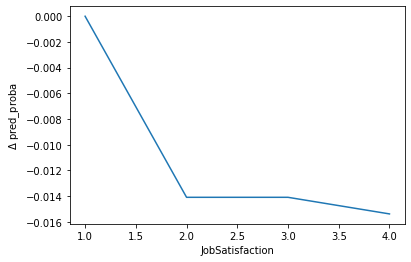

In [ ]:
ice_plot(sample = X_test_preprocessed.iloc[[100]].copy(),
         feature = features[0],
         estimator=pipe)

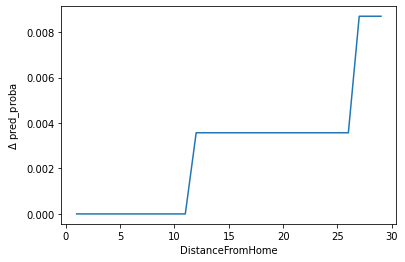

In [ ]:
ice_plot(sample = X_test_preprocessed.iloc[[100]].copy(),
         feature = features[1],
         estimator=pipe)

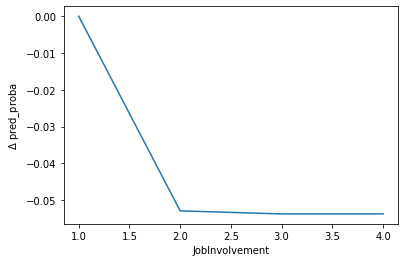

In [ ]:
ice_plot(sample = X_test_preprocessed.iloc[[100]].copy(),
         feature = features[2],
         estimator=pipe)

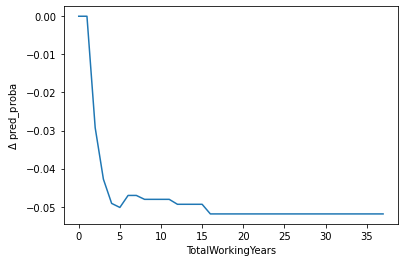

In [ ]:
ice_plot(sample = X_test_preprocessed.iloc[[100]].copy(),
         feature = features[3],
         estimator=pipe)

In [ ]:
# sorted(decline_features)
# ['JobInvolvement', 'JobSatisfaction', 'TotalWorkingYears']

## **Part 4. PDP**

- `Job satisfaction` 특성을 사용해서 pdp plot을 그려보고 타겟값과의 관계를 설명하세요.


In [ ]:
target_feature = 'JobSatisfaction'

##### **Q2. `Job satisfaction` 특성을 사용해서 pdp plot을 그려보고 타겟값과의 관계를 설명하기 위해 아래 빈칸을 채워보세요.**

> Test Set를 사용해서 PDP plot을 그려보면 `Job satisfaction` 특성 값이 변화함에 따라 타겟값이 전체적으로 _____하는 경향성을 보인다.
1. 상승
2. 하락

  

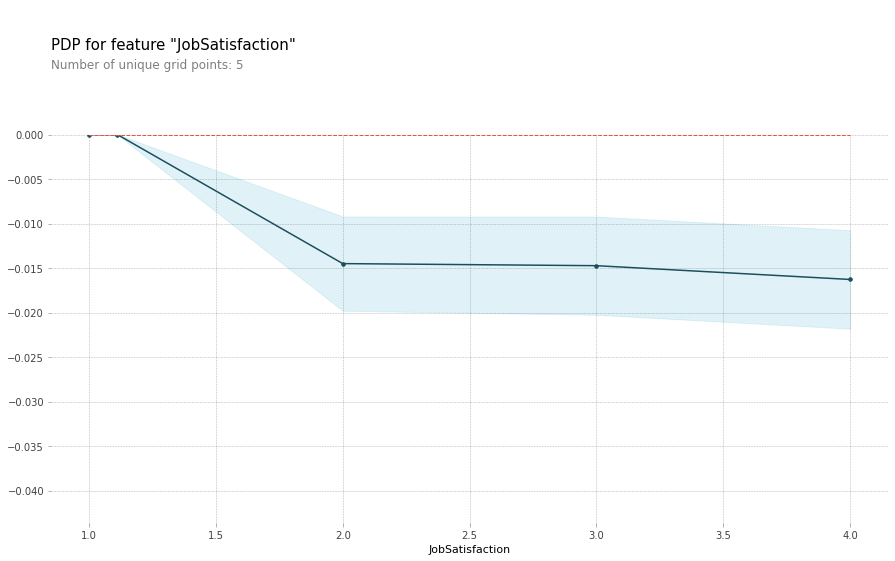

In [ ]:
isolated = pdp_isolate(
    model=pipe,
    dataset=X_test_preprocessed,
    model_features=X_test.columns,
    feature=target_feature,
    grid_type="percentile",
    num_grid_points=10,
)
pdp_plot(isolated, feature_name=target_feature);
# 하락

# 🥇 **도전 과제**

## **Part 5. 프로젝트 준비**

> #### **지난 도전과제(n231)를 먼저 수행한 후 이번 도전과제를 이어서 진행합니다.**

- 지난 도전과제에서 지시한 바와 같이 프로젝트에 사용할 데이터셋을 불러오세요. 

- 모델링을 수행한 후 순열중요도를 구하고 상위 특성만 사용해서 모델을 최적화 해보세요.

- PDP를 사용해서 모델을 들여다보고 해석해보세요.